---
**Deepfake Detection using (Gabor_Filter + CNN)**


---





In [1]:
! mkdir ~/.kaggle

In [2]:
! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d vaibhavpendke/preprocessed-dataset-v1

100% 4.13G/4.13G [03:13<00:00, 23.7MB/s]
100% 4.13G/4.13G [03:13<00:00, 22.9MB/s]


In [5]:
! unzip preprocessed-dataset-v1.zip

Streaming output truncated to the last 5000 lines.
  inflating: Preprocessed_Dataset_v1/Validation/Real/real_16847.jpg/gabor_0.0.png  
  inflating: Preprocessed_Dataset_v1/Validation/Real/real_16847.jpg/gabor_0.39269908169872414.png  
  inflating: Preprocessed_Dataset_v1/Validation/Real/real_16847.jpg/gabor_0.7853981633974483.png  
  inflating: Preprocessed_Dataset_v1/Validation/Real/real_16847.jpg/gabor_1.1780972450961724.png  
  inflating: Preprocessed_Dataset_v1/Validation/Real/real_16847.jpg/gabor_1.5707963267948966.png  
  inflating: Preprocessed_Dataset_v1/Validation/Real/real_16847.jpg/gabor_1.9634954084936207.png  
  inflating: Preprocessed_Dataset_v1/Validation/Real/real_16847.jpg/gabor_2.356194490192345.png  
  inflating: Preprocessed_Dataset_v1/Validation/Real/real_16847.jpg/gabor_2.748893571891069.png  
  inflating: Preprocessed_Dataset_v1/Validation/Real/real_16858.jpg/gabor_0.0.png  
  inflating: Preprocessed_Dataset_v1/Validation/Real/real_16858.jpg/gabor_0.3926990816987

In [6]:
import os
import cv2
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:

train_directory = "/content/Preprocessed_Dataset_v1/Train"
test_directory = "/content/Preprocessed_Dataset_v1/Test"
validation_directory = "/content/Preprocessed_Dataset_v1/Validation"

In [8]:

batch_size = 32
image_size = (256, 256)


train_datagen = ImageDataGenerator(
    rescale=1.0 / 255
)

train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary', 
    shuffle=True
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255)

validation_generator = validation_datagen.flow_from_directory(
    validation_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  
)

Found 80000 images belonging to 2 classes.
Found 16000 images belonging to 2 classes.


In [9]:

model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 128)               3

In [11]:

model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
2500/2500 [==============================] - 326s 125ms/step - loss: 0.6027 - accuracy: 0.6712 - val_loss: 0.5981 - val_accuracy: 0.6662
Epoch 2/10
2500/2500 [==============================] - 287s 115ms/step - loss: 0.4530 - accuracy: 0.7700 - val_loss: 0.6583 - val_accuracy: 0.6817
Epoch 3/10
2500/2500 [==============================] - 281s 112ms/step - loss: 0.3138 - accuracy: 0.8480 - val_loss: 0.7942 - val_accuracy: 0.6973
Epoch 4/10
2500/2500 [==============================] - 278s 111ms/step - loss: 0.2130 - accuracy: 0.8997 - val_loss: 1.0378 - val_accuracy: 0.6986
Epoch 5/10
2500/2500 [==============================] - 272s 109ms/step - loss: 0.1624 - accuracy: 0.9235 - val_loss: 1.3754 - val_accuracy: 0.6824
Epoch 6/10
2500/2500 [==============================] - 268s 107ms/step - loss: 0.1317 - accuracy: 0.9383 - val_loss: 1.5937 - val_accuracy: 0.6832
Epoch 7/10
2500/2500 [==============================] - 269s 107ms/step - loss: 0.1166 - accuracy: 0.9467 - val_

In [12]:
model.save('Gabor_filter_CNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
from tensorflow.keras.preprocessing import image
import cv2
import os
import numpy as np


def apply_gabor_filters_and_save(image, output_directory, filename):
    num_orientations = 8

    for theta in range(num_orientations):
        theta_val = theta / num_orientations * np.pi
        kernel = cv2.getGaborKernel((5, 5), 2.0, theta_val, 1.0, 0.5, 0, ktype=cv2.CV_32F)
        filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)
        filtered_image_filename = f"gabor_{theta}.png"
        output_class_directory = os.path.join(output_directory, filename)
        os.makedirs(output_class_directory, exist_ok=True)
        filtered_image_path = os.path.join(output_class_directory, filtered_image_filename)
        cv2.imwrite(filtered_image_path, filtered_image)


img_path_1 = '/content/S_R_PIC.png'
img_name_1 = 'Image_1'

img_path_2 = '/content/S_F_PIC.png'
img_name_2 = 'Image_2'


img_1 = cv2.imread(img_path_1)
img_2 = cv2.imread(img_path_2)


apply_gabor_filters_and_save(img_1, 'output_directory', img_name_1)


apply_gabor_filters_and_save(img_2, 'output_directory', img_name_2)


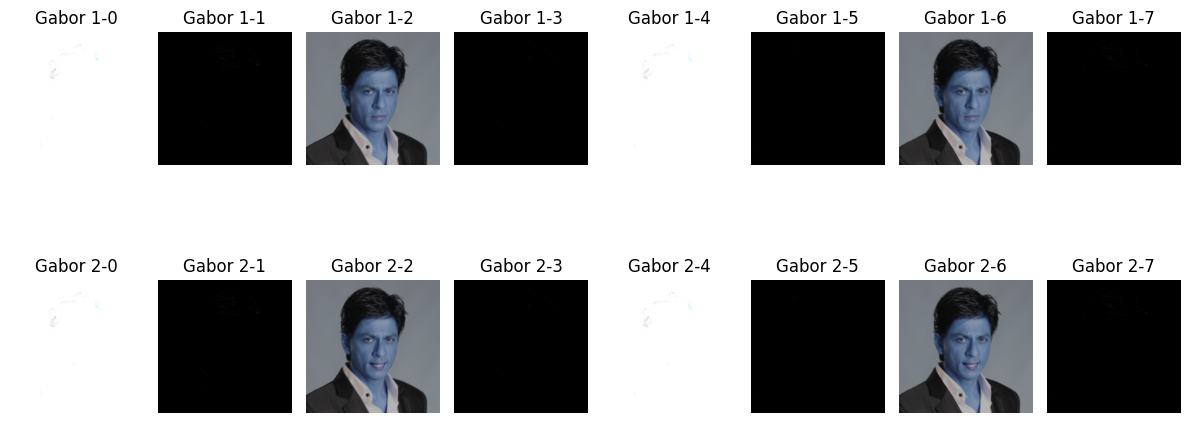

In [37]:
import matplotlib.pyplot as plt


gabor_img_1_paths = [os.path.join('output_directory', img_name_1, f'gabor_{i}.png') for i in range(8)]
gabor_img_2_paths = [os.path.join('output_directory', img_name_2, f'gabor_{i}.png') for i in range(8)]

plt.figure(figsize=(12, 6))

for i in range(8):
    plt.subplot(2, 8, i+1)
    gabor_img = cv2.imread(gabor_img_1_paths[i])
    plt.imshow(gabor_img, cmap='gray')
    plt.title(f'Gabor 1-{i}')
    plt.axis('off')

for i in range(8):
    plt.subplot(2, 8, i+9)
    gabor_img = cv2.imread(gabor_img_2_paths[i])
    plt.imshow(gabor_img, cmap='gray')
    plt.title(f'Gabor 2-{i}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [47]:

gabor_img_1 = cv2.imread('output_directory/Image_1/gabor_0.png') 
gabor_img_2 = cv2.imread('output_directory/Image_2/gabor_0.png')


gabor_img_1 = cv2.resize(gabor_img_1, (256, 256))  
gabor_img_1 = np.expand_dims(gabor_img_1, axis=0)
gabor_img_1 = gabor_img_1 / 255.0 

gabor_img_2 = cv2.resize(gabor_img_2, (256, 256)) 
gabor_img_2 = np.expand_dims(gabor_img_2, axis=0)
gabor_img_2 = gabor_img_2 / 255.0  


result_1_gabor = model.predict(gabor_img_1)
if result_1_gabor[0][0] > 0.5:
    prediction_1_gabor = 'Real'
else:
    prediction_1_gabor = 'Deepfake'

print(f'For Image 1 Gabor Filtered: The image is predicted as {prediction_1_gabor}')


result_2_gabor = model.predict(gabor_img_2)
if result_2_gabor[0][0] > 0.5:
    prediction_2_gabor = 'Real'
else:
    prediction_2_gabor = 'Deepfake'

print(f'For Image 2 Gabor Filtered: The image is predicted as {prediction_2_gabor}')


1/1 [==============================] - 0s 18ms/step
For Image 1 Gabor Filtered: The image is predicted as Real
1/1 [==============================] - 0s 18ms/step
For Image 2 Gabor Filtered: The image is predicted as Deepfake
